<a href="https://colab.research.google.com/github/jaskirat0001/Z-Statistic/blob/main/Copy_of_zscore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [3]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pylab
import seaborn as sns
import scipy.stats as stats
from pandas_datareader import data as pdr
import plotly.offline as pyo
!pip install yfinance
import yfinance as yf

pyo.init_notebook_mode(connected=True)
pd.options.plotting.backend='plotly'

Upgrading libraries


In [4]:
!pip install --upgrade pandas-datareader

!pip install --upgrade pandas matplotlib

#getting stockmarket data

In [5]:
# end = dt.datetime.now()
# start = dt.datetime(2023,1,1)

# TWTR = yf.Ticker('TWTR')
# ticker =  TWTR.history(start,end)
start = pd.to_datetime(['2022-01-01']).astype(int)[0]//10**9 # convert to unix timestamp.
end = pd.to_datetime(['2023-01-01']).astype(int)[0]//10**9 # convert to unix timestamp.
url = 'https://query1.finance.yahoo.com/v7/finance/download/' + 'CBA.AX' + '?period1=' + str(start) + '&period2=' + str(end) + '&interval=1d&events=history'
df = pd.read_csv(url)

In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-04,102.000000,102.820000,101.300003,102.510002,96.582413,2195465
1,2022-01-05,103.279999,103.480003,102.620003,103.199997,97.232506,2086996
2,2022-01-06,102.800003,103.129997,99.779999,99.970001,94.189285,2603548
3,2022-01-07,101.989998,102.870003,101.889999,102.650002,96.714310,2596039
4,2022-01-10,102.870003,103.320000,102.080002,103.320000,97.345573,1467407


#calculating simple returns

In [7]:
simple_returns = df.Close.pct_change()
simple_returns

0           NaN
1      0.006731
2     -0.031298
3      0.026808
4      0.006527
         ...   
246    0.008498
247   -0.007574
248   -0.016409
249   -0.009893
250    0.005094
Name: Close, Length: 251, dtype: float64

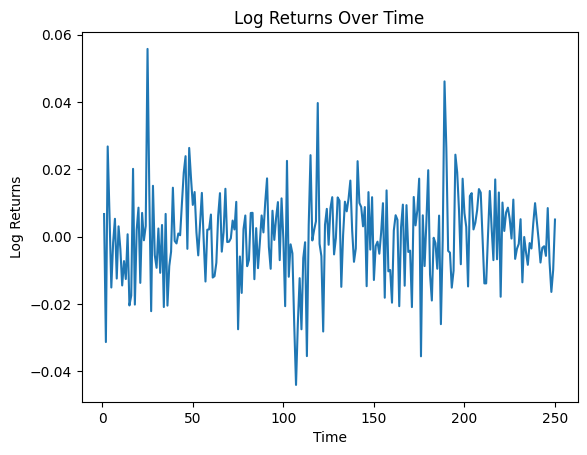

In [26]:
%matplotlib inline
# plt.df.Close.plot().update_layout(autosize = False,width=500,height=300)
# df['Close'].plot()
# df.plot(x='Date',y = 'Close',kind = 'line')
# # plt.show()
# plt.show()
plt.plot(simple_returns)
plt.xlabel('Time')
plt.ylabel('Simple Returns')
plt.title('Simple Returns Over Time')
plt.show()

In [13]:
print('First',df.Close[0] ,'Last' ,df.Close[250])

First 102.510002 Last 102.599998


In [14]:
simple_returns.dropna(inplace=True)

In [15]:
simple_returns.mean()

9.043628234491141e-05

#as per average price should be

In [16]:
df.Close[0]*(1+simple_returns.mean())**len(simple_returns)

104.85394927744899

In [17]:
df.Close[0] * np.prod([(1+Rt) for Rt in simple_returns])

102.5999979999999

#Log Returns

In [19]:
log_returns = np.log(df.Close/df.Close.shift(1)).dropna()
log_returns

1      0.006708
2     -0.031799
3      0.026455
4      0.006506
5     -0.015214
         ...   
246    0.008462
247   -0.007603
248   -0.016545
249   -0.009943
250    0.005081
Name: Close, Length: 250, dtype: float64

In [20]:
log_returns.mean()

3.5101557515572757e-06

In [21]:
df.Close[0]*np.exp(log_returns.mean()*len(log_returns))

102.59999799999994

#plotting of graphs


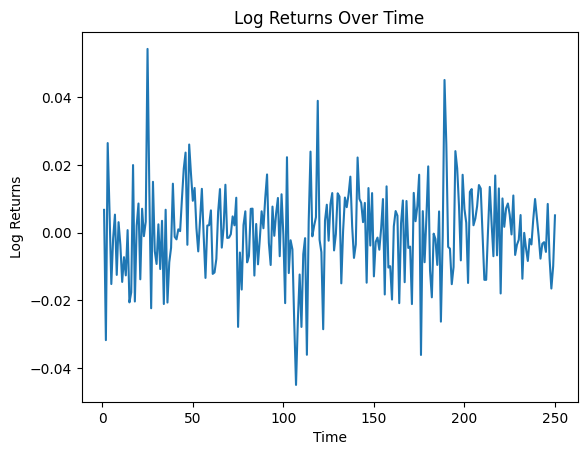

In [23]:
# %matplotlib inline
# # log_returns.plot(kind='hist').update_layout(autosize=False,width=500,height=300)
# log_returns.plot(kind='hist')
# # plt.show()
# plt.show()
plt.plot(log_returns)
plt.xlabel('Time')
plt.ylabel('Log Returns')
plt.title('Log Returns Over Time')
plt.show()

In [27]:
log_returns_sorted = log_returns.tolist()
log_returns_sorted.sort()
worst = log_returns_sorted[0]
best = log_returns_sorted[-1]

std_worst = (worst-log_returns.mean())/log_returns.std()
std_best = (best-log_returns.mean())/log_returns.std()

print("std_worst:",std_worst)
print("std_best:",std_best)
print('Probability of %.10f best %.10f',stats.norm(0,1).pdf(std_worst),stats.norm(0,1).pdf(std_best))

std_worst: -3.409569025601452
std_best: 4.10877376586804
Probability of %.10f best %.10f 0.0011927198359640858 8.610445008873104e-05
